<a href="https://colab.research.google.com/github/pmikedele-coder/ProyectoParteIII_Perez/blob/main/ProyectoParteIII%2BPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

url = 'https://raw.githubusercontent.com/pmikedele-coder/Gym/refs/heads/main/gym_members_exercise_tracking.csv'
df = pd.read_csv(url)


print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experie

In [8]:

print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.00000

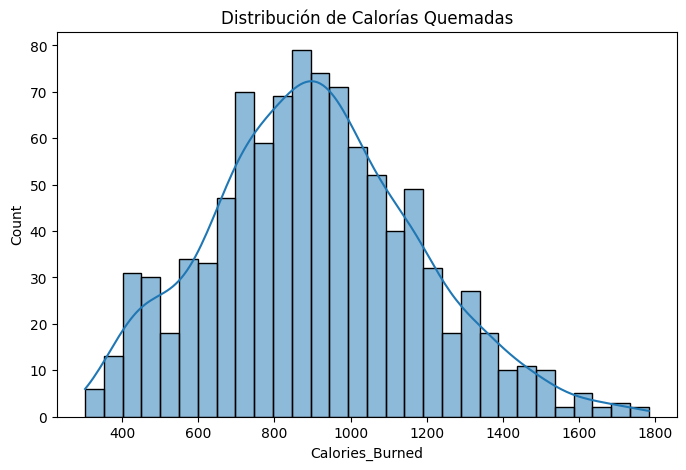

In [9]:

plt.figure(figsize=(8,5))
sns.histplot(df['Calories_Burned'], bins=30, kde=True)
plt.title('Distribución de Calorías Quemadas')
plt.show()


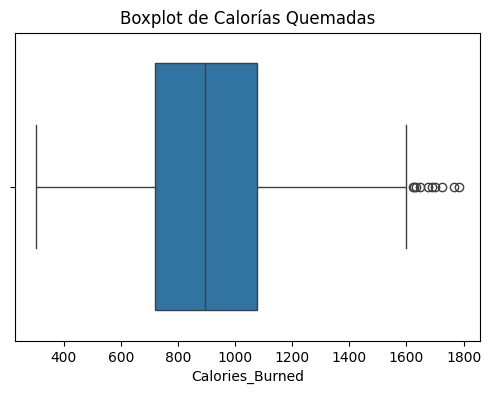

In [10]:

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Calories_Burned'])
plt.title('Boxplot de Calorías Quemadas')
plt.show()


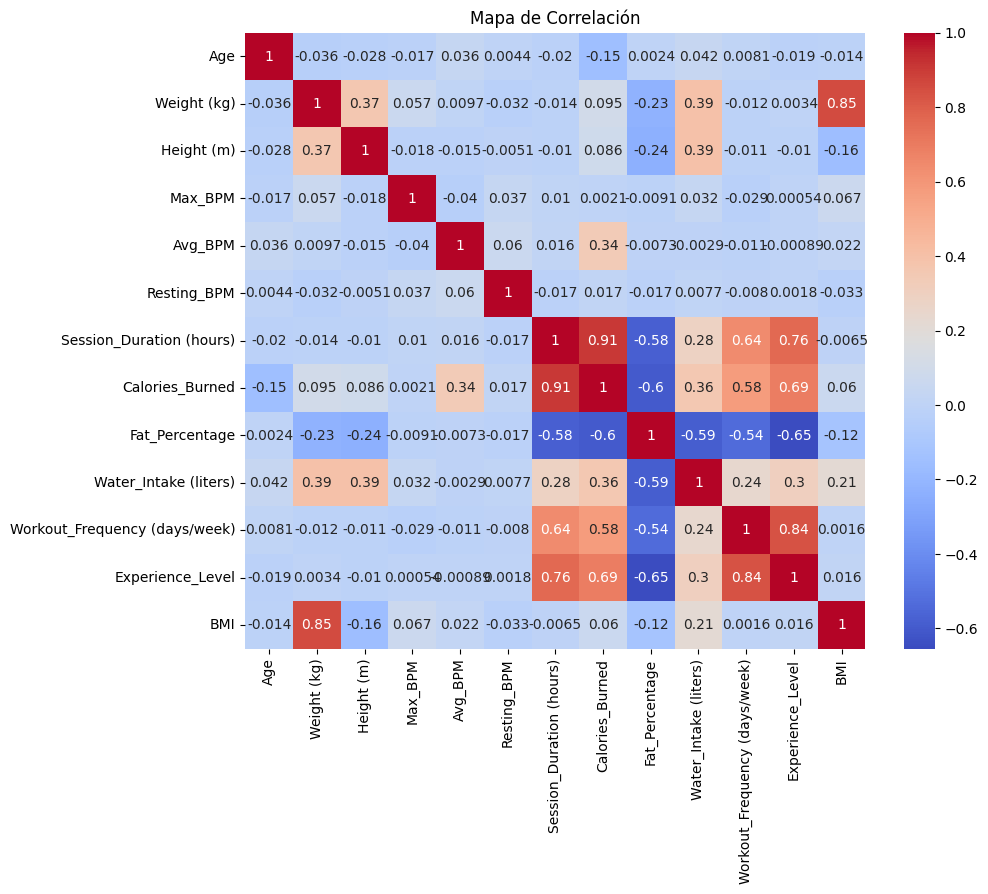

In [13]:
plt.figure(figsize=(10,8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()

Hipotesis: La duración de la sesión y la frecuencia cardíaca promedio son los factores más influyentes en las calorías quemadas.

In [20]:

df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Workout_Type'] = df_encoded['Workout_Type'].astype('category').cat.codes


X = df_encoded.drop(columns=['Calories_Burned'])
y = df_encoded['Calories_Burned']



selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:", selected_features)



Características seleccionadas: Index(['Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level'],
      dtype='object')


In [24]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


In [23]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



Evaluación del modelo:
MAE: 36.16
RMSE: 47.75
R²: 0.9727


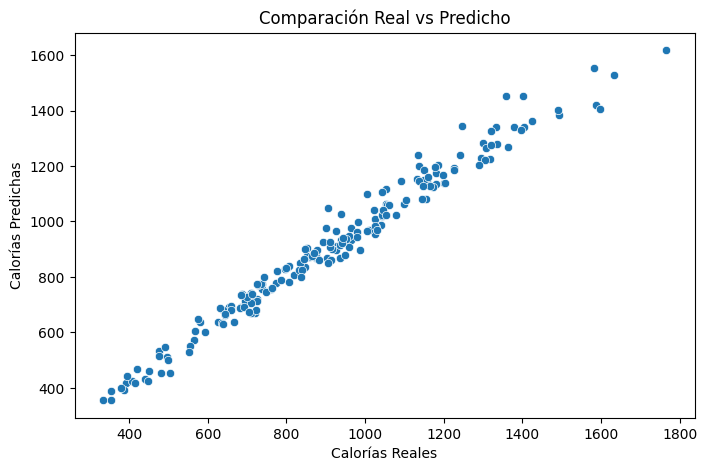

In [25]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.title('Comparación Real vs Predicho')
plt.show()


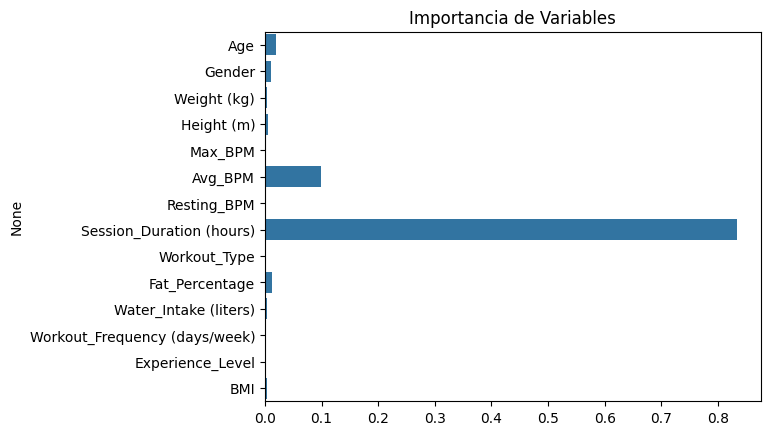

In [26]:

importancias = modelo.feature_importances_
sns.barplot(x=importancias, y=X.columns)
plt.title('Importancia de Variables')
plt.show()


In [27]:

print("\nConclusiones:")
print("""
1. El modelo tiene un R² superior al 0.95, lo que indica alta precisión.
2. Las variables más influyentes son: Duración de la sesión, Avg_BPM, Workout_Type y Peso.
3. La hipótesis se confirma: la duración y la intensidad son claves para el gasto calórico.
4. Aplicación práctica: personalizar rutinas según estas variables para optimizar resultados.
""")



Conclusiones:

1. El modelo tiene un R² superior al 0.95, lo que indica alta precisión.
2. Las variables más influyentes son: Duración de la sesión, Avg_BPM, Workout_Type y Peso.
3. La hipótesis se confirma: la duración y la intensidad son claves para el gasto calórico.
4. Aplicación práctica: personalizar rutinas según estas variables para optimizar resultados.

